In [280]:
import numpy as np
import pandas
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.pyplot import yticks
import chart_studio.plotly as py
from plotly.graph_objs import *
import seaborn as sns
from collections import Counter
pandas.options.display.float_format = '{:20,.2f}'.format

%matplotlib inline

df = pandas.read_csv('developer_survey_2019/survey_results_public.csv')
schema = pandas.read_csv('developer_survey_2019/survey_results_schema.csv').set_index('Column')

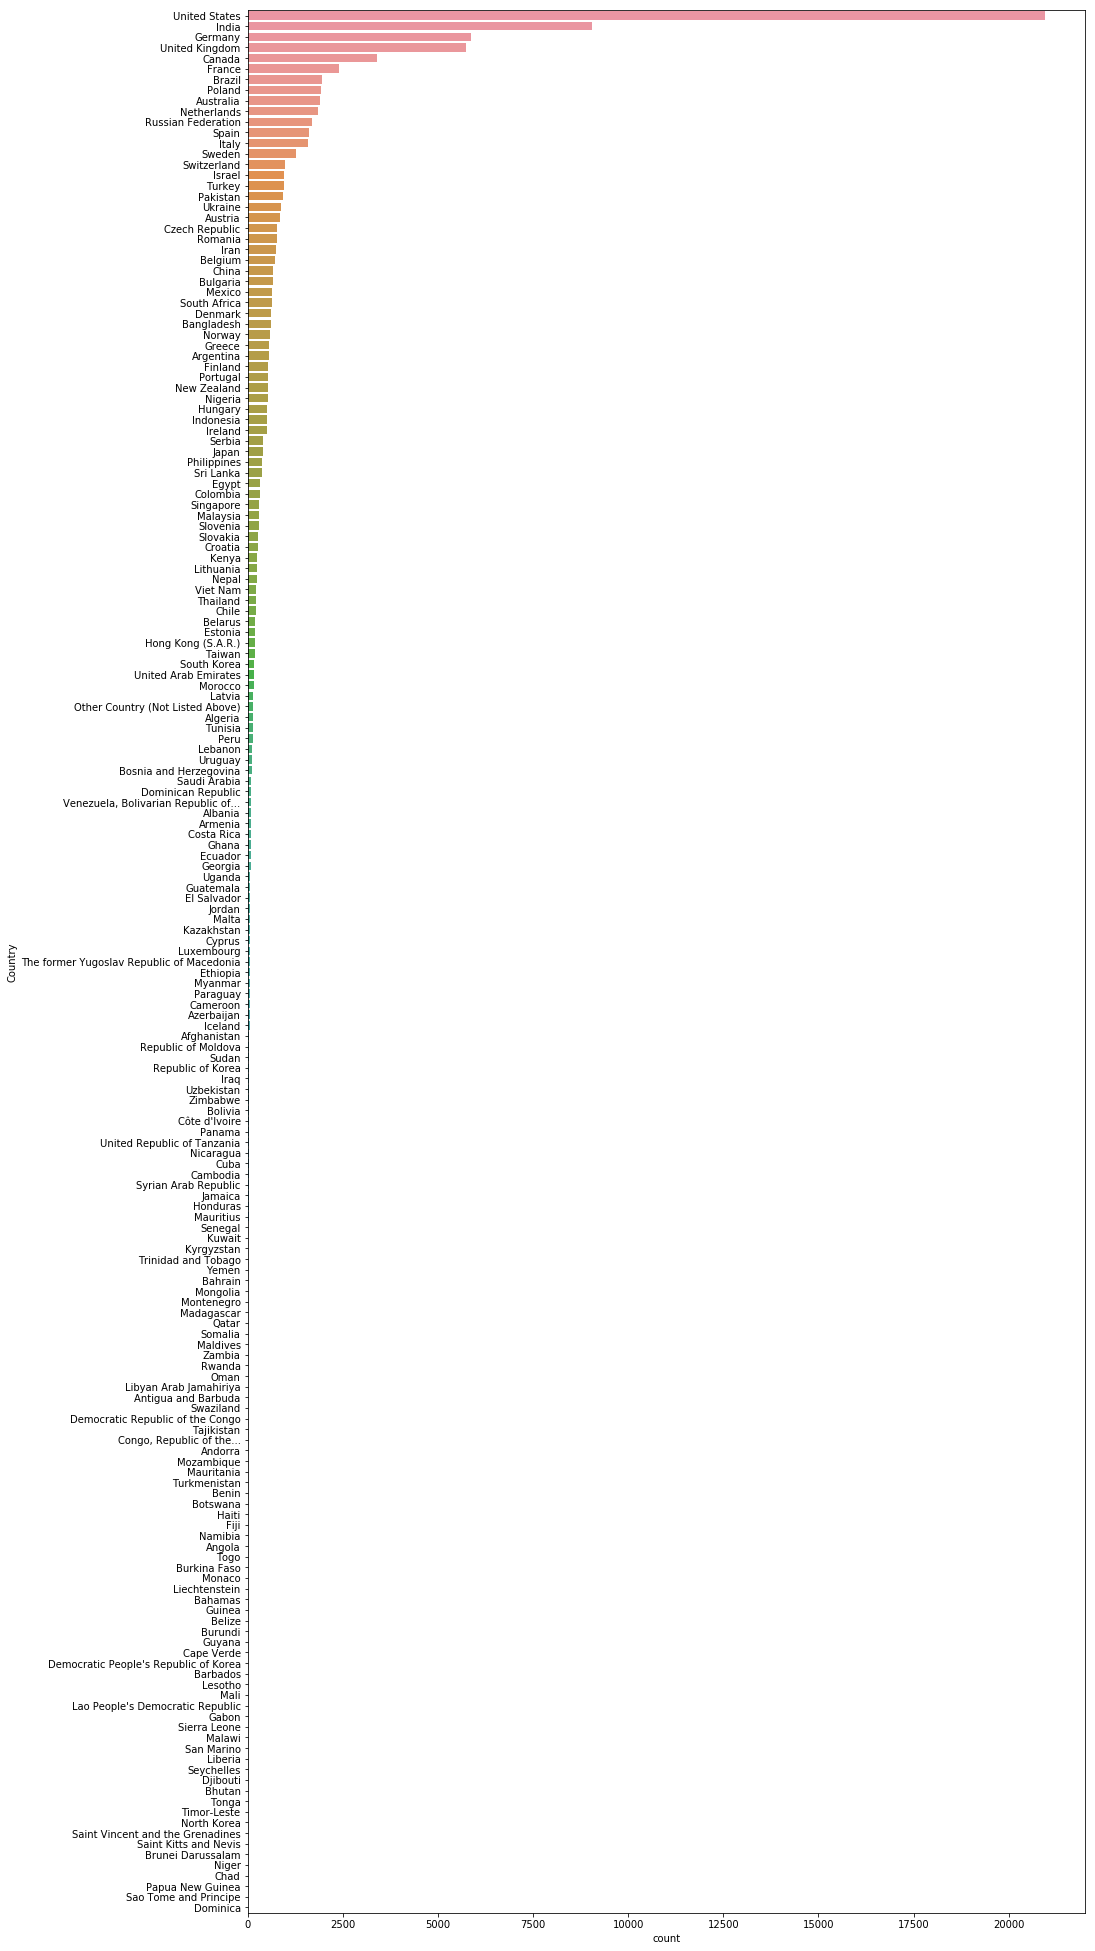

In [281]:
plt.subplots(figsize=(15,35))
sns.countplot(y = df.Country, order = df.Country.value_counts().index)

In [282]:
"""
first 5 countries and China: 
United States                            20949
India                                     9061
Germany                                   5866
United Kingdom                            5737
Canada                                    3395
China                                      664 
"""
       
df.Country.value_counts()


United States                            20949
India                                     9061
Germany                                   5866
United Kingdom                            5737
Canada                                    3395
France                                    2391
Brazil                                    1948
Poland                                    1922
Australia                                 1903
Netherlands                               1852
Russian Federation                        1694
Spain                                     1604
Italy                                     1576
Sweden                                    1274
Switzerland                                978
Israel                                     952
Turkey                                     949
Pakistan                                   923
Ukraine                                    868
Austria                                    839
Czech Republic                             764
Romania      

In [283]:
countries_of_interest = ['United States','India','Germany','United Kingdom','Canada','China']


In [284]:
df.CareerSat.unique()

array([nan, 'Slightly satisfied', 'Very satisfied', 'Very dissatisfied',
       'Slightly dissatisfied', 'Neither satisfied nor dissatisfied'],
      dtype=object)

In [285]:
CareerSat = df.CareerSat.dropna()

In [286]:
CareerSat.unique()

array(['Slightly satisfied', 'Very satisfied', 'Very dissatisfied',
       'Slightly dissatisfied', 'Neither satisfied nor dissatisfied'],
      dtype=object)

In [287]:
def to_satisfied_value(label):
    sat_map = {  
        'Very dissatisfied': 0,
        'Slightly dissatisfied': 1, 
        'Neither satisfied nor dissatisfied': 2, 
        'Slightly satisfied': 3, 
        'Very satisfied': 4
              }
    return sat_map[label]

In [288]:
carrer_sat_df = pandas.DataFrame(countries_of_interest, columns=['Country'])


In [289]:
carrer_sat_df['CareerSat'] = carrer_sat_df['Country'].apply(
    lambda c: df[df['Country'] == c]['CareerSat'].dropna().apply(to_satisfied_value).mean())

In [290]:
carrer_sat_df

,Country,CareerSat
0,United States,3.20
1,India,2.71
2,Germany,2.93
3,United Kingdom,3.05
4,Canada,3.11
5,China,2.17


In [291]:
coi_df = df[df['Country'].map(lambda x: x in countries_of_interest)]
coi_df = coi_df.dropna(subset=['JobSat', 'CareerSat'])
coi_df['JobSat'] = coi_df['JobSat'].apply(to_satisfied_value)
coi_df['CareerSat']=coi_df['CareerSat'].apply(to_satisfied_value)

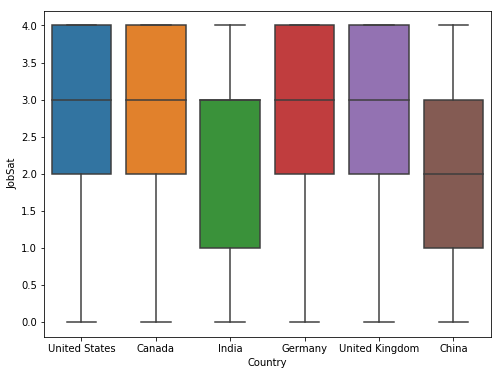

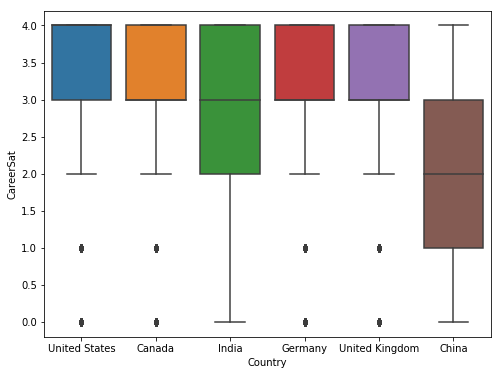

In [292]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(x="Country", y="JobSat", data=coi_df)
fig = plt.figure(figsize=(8,6))
sns.boxplot(x="Country", y="CareerSat", data=coi_df)

In [293]:
coi_df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.00,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.00,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,nan,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
12,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.00,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
13,14,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,31.00,Man,No,Straight / Heterosexual,White or of European descent,No,Too short,Easy
15,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.00,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
21,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,47.00,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
22,23,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,22.00,Man,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
25,26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,34.00,Man,No,Gay or Lesbian,NaN,No,Appropriate in length,Easy
28,29,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Unite

In [294]:
coi_df[['Country', 'CompTotal', 'JobSat', 'CareerSat']].groupby('Country').mean()

,CompTotal,JobSat,CareerSat
Country,,,
Canada,"90,016.89",2.89,3.14
China,"99,610.71",2.00,2.21
Germany,"48,937.53",2.71,2.94
India,"50,688,686.75",2.44,2.72
United Kingdom,"168,387.33",2.78,3.06
United States,"1,332,889,298,658.99",2.89,3.22


In [295]:
coi_df['CurrencySymbol'].value_counts().head(6)

USD    17828
INR     6570
GBP     4810
EUR     4738
CAD     2661
CNY      422
Name: CurrencySymbol, dtype: int64

In [296]:
def any_currency_to_usd(currency,money):
    if currency == 'INR':
        return 0.014 * money
    elif currency == 'GBP':
        return 1.24 * money
    elif currency == 'EUR':
        return 1.11 * money
    elif currency == 'CAD':
        return 0.76 * money
    elif currency == 'CNY':
        return 0.15 * money
    else:
        return money

In [297]:
currency_of_interest = ['USD','INR','GBP','EUR','CAD','CNY']

In [298]:
coi_df_curroi_df = coi_df[coi_df['CurrencySymbol'].map(lambda x: x in currency_of_interest)]


In [299]:
coi_df_curroi_df['CurrencySymbol']

3        USD
5        CAD
9        INR
12       USD
13       EUR
15       GBP
21       USD
22       USD
25       USD
28       USD
31       USD
34       USD
35       EUR
38       USD
43       EUR
44       USD
45       USD
46       USD
49       INR
52       USD
55       CNY
57       USD
59       USD
60       USD
64       INR
65       EUR
67       INR
69       USD
74       INR
75       GBP
        ... 
88266    USD
88273    INR
88274    USD
88275    USD
88278    USD
88281    GBP
88282    USD
88283    USD
88287    USD
88289    CAD
88290    USD
88291    INR
88293    CAD
88298    USD
88301    USD
88302    CAD
88303    USD
88305    USD
88306    CAD
88309    EUR
88312    USD
88315    EUR
88316    INR
88319    INR
88320    CAD
88321    USD
88323    USD
88324    USD
88325    USD
88327    USD
Name: CurrencySymbol, Length: 37029, dtype: object

In [300]:
coi_df_curroi_df.CompTotal = coi_df_curroi_df.apply(lambda x: any_currency_to_usd(x.CurrencySymbol, x.CompTotal), axis=1)

In [301]:
coi_df_curroi_df = coi_df_curroi_df.dropna(subset=['CompTotal'])


In [302]:
coi_df_curroi_df[['Country', 'CompTotal', 'JobSat', 'CareerSat']].groupby('Country').median()

,CompTotal,JobSat,CareerSat
Country,,,
Canada,"63,080.00",3,3
China,"2,775.00",2,2
Germany,"54,390.00",3,3
India,"5,943.00",3,3
United Kingdom,"55,800.00",3,3
United States,"102,000.00",3,4


In [303]:
coi_df_curroi_df[['Country', 'CompTotal', 'JobSat', 'CareerSat']].groupby('Country').mean()

,CompTotal,JobSat,CareerSat
Country,,,
Canada,"67,915.46",2.90,3.17
China,"15,087.39",1.95,2.12
Germany,"47,305.81",2.70,2.94
India,"12,797.99",2.38,2.70
United Kingdom,"62,869.09",2.79,3.09
United States,"1,333,511,391,609.39",2.89,3.24


In [304]:
def cat_comp_to_level(comp):
    if comp < 50000:
        return 'less than 50K usd'
    elif comp >= 50000 and comp <100000:
        return 'between 50K and 100K'
    elif comp >= 100000 and comp < 200000:
        return 'between 100K and 200K'
    else:
        return 'more than 200K'

In [312]:
def show_distribution_of_income(country,total_df):
    levels=total_df[total_df.Country==country].CompTotal.apply(cat_comp_to_level)
    return (country,levels.values)
    

In [306]:
print(show_distribution_of_income('India',coi_df_curroi_df))

('India', array(['between 50K and 100K', 'less than 50K usd', 'less than 50K usd',
       ..., 'between 100K and 200K', 'more than 200K',
       'between 100K and 200K'], dtype=object))


In [307]:
income_level_list = []

In [308]:
for country in countries_of_interest:
    income_level_list.append(show_distribution_of_income(country,coi_df_curroi_df))

In [309]:
for i in income_level_list:
    print(len(i[1]))

29301
29301
29301
29301
29301
29301


In [310]:
cdict = dict(zip(np.unique(['less than 50K usd','between 50K and 100K','between 100K and 200K','more than 200K']),cm.tab10.colors))


In [276]:
income_level_dict = dict(income_level_list)

In [277]:
counter_income_level = {}

In [278]:
for country,levels in income_level_list:
        counter_income_level[country]=dict([(level,num/sum(Counter(levels).values())) for level,num in Counter(levels).items()])

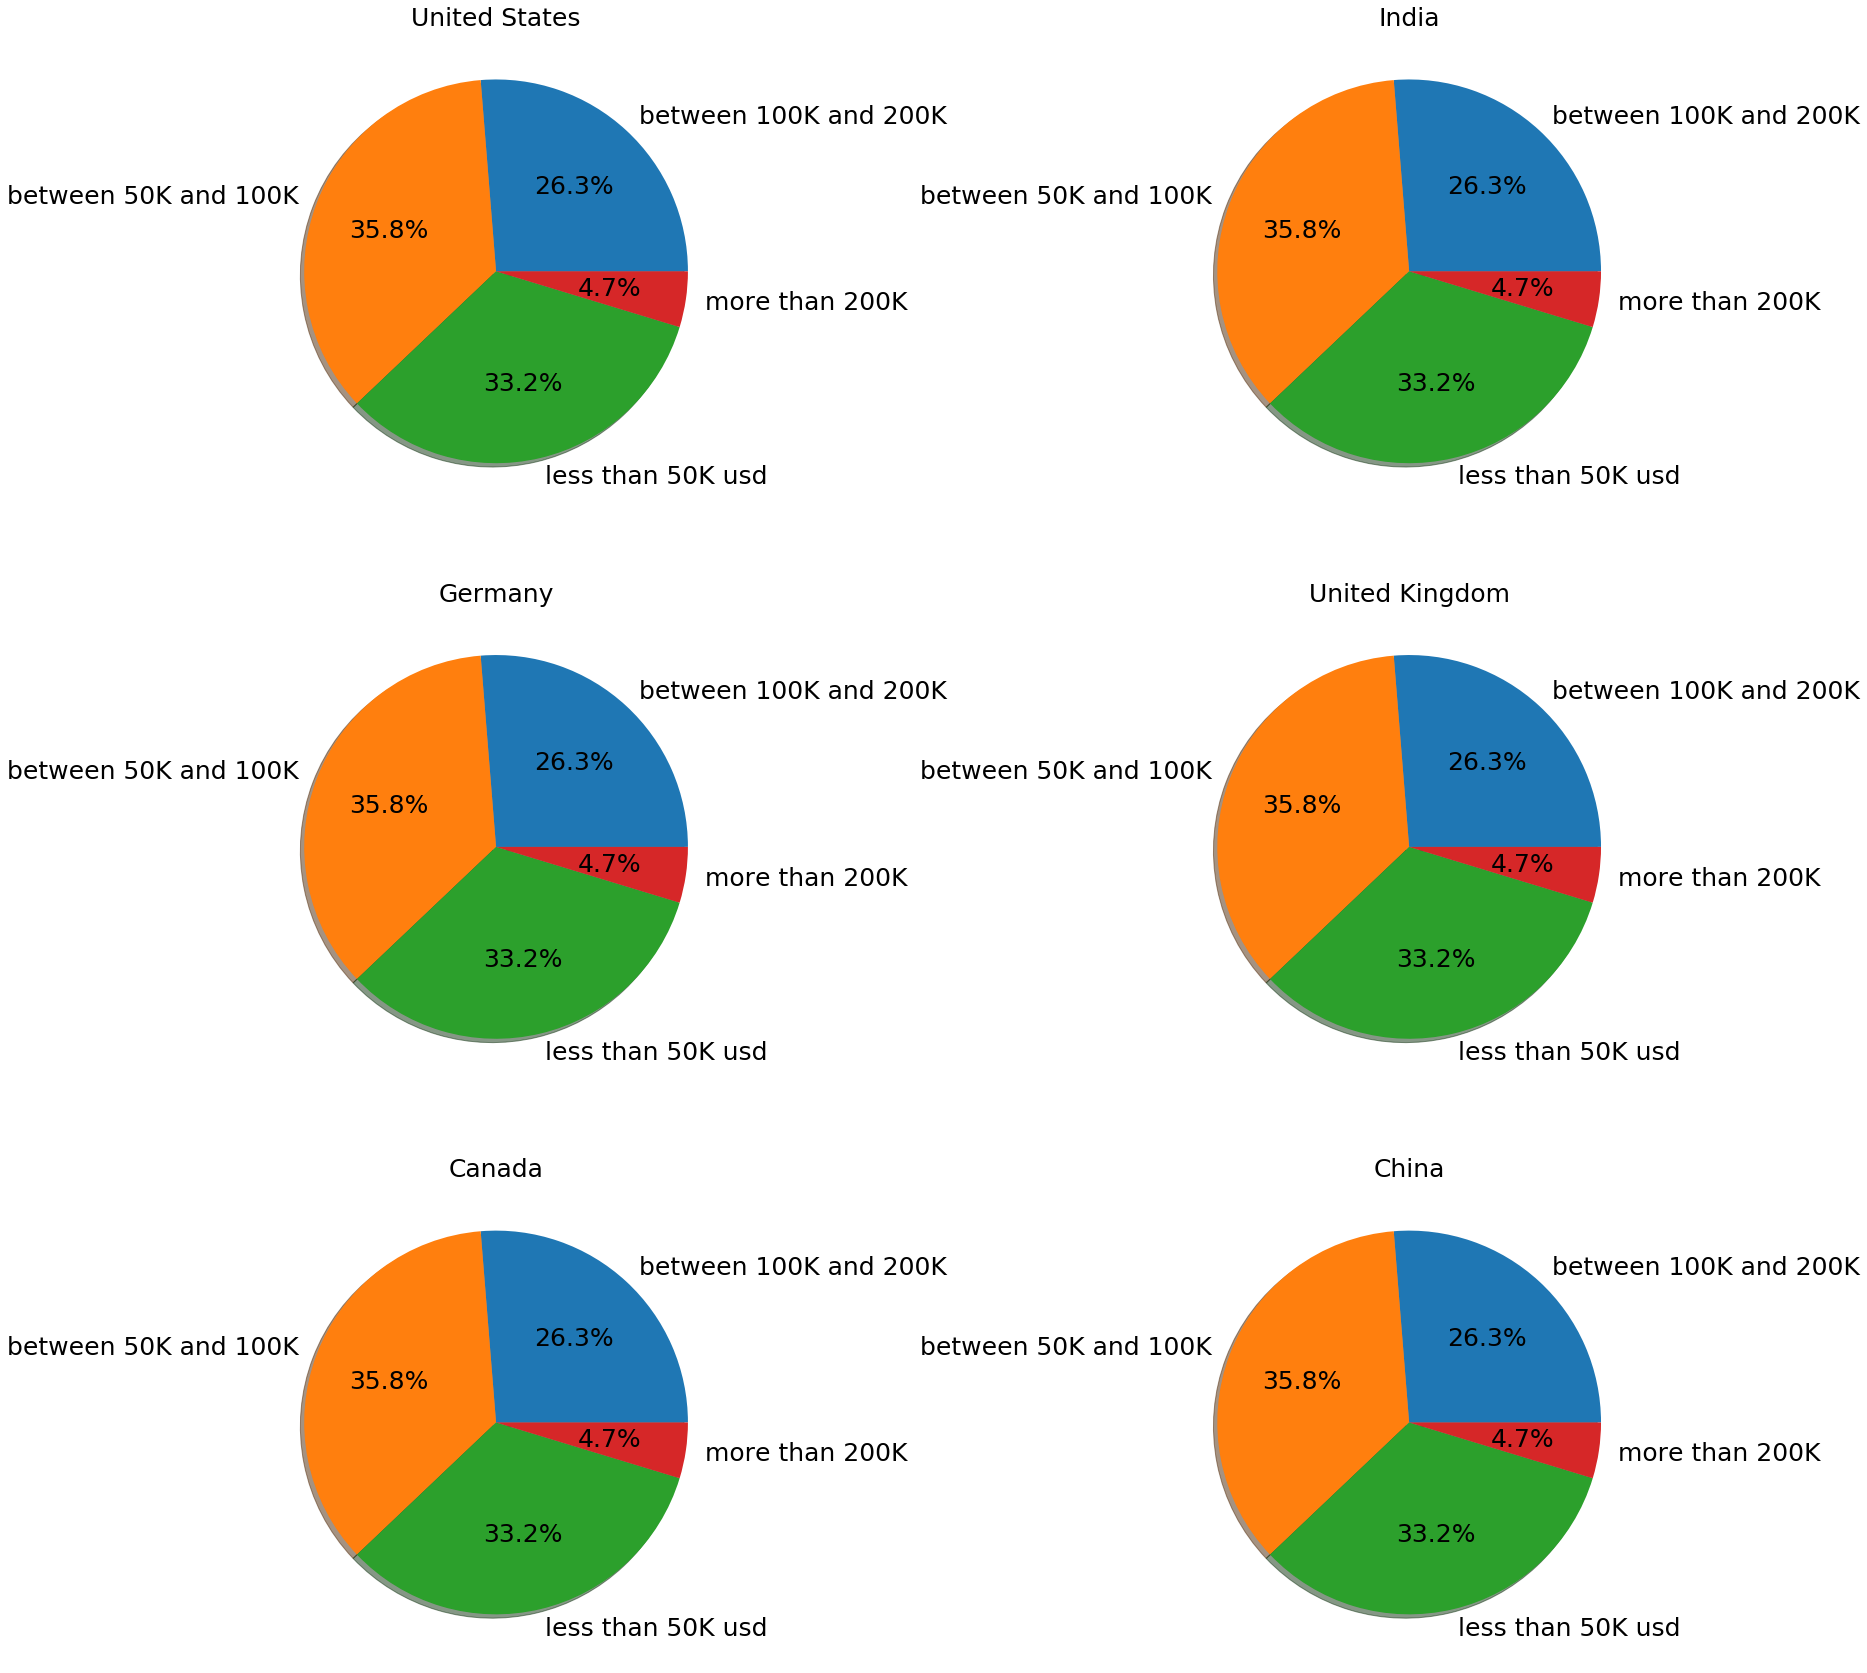

In [279]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(30,30))
counter_income_level_iter = iter(counter_income_level.items())
for i in range(3):
    for j in range(2):
        current_country,current_stats = next(counter_income_level_iter)
        current_stats = current_stats.items()
        current_stats = sorted(current_stats)
        axes[i, j].set_title(current_country,fontsize=25)
        axes[i, j].pie([i[1] for i in current_stats],labels=[i[0] for i in current_stats], autopct='%1.1f%%', shadow=True,textprops={'fontsize': 25})

        
        

In [62]:
the_usa_df = coi_df_curroi_df[coi_df_curroi_df.Country=='United States'][['Country', 'CompTotal', 'JobSat', 'CareerSat','SocialMedia']]


In [64]:
the_usa_df_without_comp_na = the_usa_df.dropna(subset=['CompTotal'])


In [66]:
the_usa_df_without_comp_na

,Country,CompTotal,JobSat,CareerSat,SocialMedia
3,United States,61000.0,3,4,Reddit
12,United States,90000.0,4,4,Twitter
21,United States,103000.0,0,3,Instagram
22,United States,69000.0,3,3,Reddit
25,United States,114000.0,4,4,I don't use social media
28,United States,2000.0,3,4,Reddit
31,United States,22000.0,3,3,YouTube
34,United States,80000.0,0,3,Instagram
38,United States,156000.0,4,4,Reddit
44,United States,175000.0,3,3,Facebook


In [103]:
mean_of_social=the_usa_df_without_comp_na.groupby('SocialMedia').median()

In [104]:
mean_of_social.sort_values(by='CompTotal', ascending=False)

,CompTotal,JobSat,CareerSat
SocialMedia,,,
WeChat 微信,"130,000.00",3,3
LinkedIn,"119,000.00",3,4
Twitter,"115,000.00",3,4
WhatsApp,"114,000.00",3,3
Facebook,"105,000.00",3,4
I don't use social media,"105,000.00",3,3
Instagram,"104,000.00",3,4
VK ВКонта́кте,"100,000.00",2,3
Reddit,"96,000.00",3,4
